In [396]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [397]:
%pwd
%cd drive/My Drive/MLSP/Assign3
%pwd

[Errno 2] No such file or directory: 'drive/My Drive/MLSP/Assign3'
/content/drive/My Drive/MLSP/Assign3


'/content/drive/My Drive/MLSP/Assign3'

In [398]:
%ls -ltr

total 7871
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_2.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_3.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_5.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_4.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_1.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_7.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_6.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_19.wav
-rw------- 1 root root 1012376 Mar  5 00:45 trs.wav
-rw------- 1 root root  166190 Mar  5 00:45 piano.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_18.wav
-rw------- 1 root root  696677 Mar  5 00:45 eeg.mat
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_20.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_10.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_13.wav
-rw------- 1 root root  153644 Mar  5 00:45 x_ica_11.wav
-rw------- 1 root root  165100 Mar  5 00:45 ocean.wav
-rw------- 1 root root 1012376 Mar  5 00:45

In [0]:
import cv2 as cv
import numpy as np
import math
import scipy.io
from scipy.io import wavfile
import random
import IPython
import librosa
import glob
import pandas as pd
from matplotlib import pyplot as plt


# P1: Instantaneous Source Separation

In [400]:
dir = 'content/drive/My Drive/MLSP/Assign3'
list_of_files = glob.glob('./x_ica*.wav') 
X = []
for file in sorted(list_of_files):
  f,x= wavfile.read(file)
  X.append(x)
X=np.array(X)
X.shape  

(20, 76800)

In [401]:
Covarience_mat=np.cov(X)
Covarience_mat.shape

(20, 20)

In [402]:
Covarience_mat

array([[15531266.13836104,  8394201.22069733,  8130645.79247932,
         9830485.34553247, 18960772.52889873, 12132092.59579197,
         8902568.75988327,  8110959.14561936, 11833607.20687085,
        13107117.15296576, 10171497.50342644, 10903197.72256194,
         6528910.26728662,  8006600.50407707,  8941953.41510663,
        10091064.71525672,  7819101.0627044 , 12943973.77554707,
         7587481.08523538,  7664781.52128622],
       [ 8394201.22069733,  9762461.29349754, 10224778.14423401,
         9116307.29058882,  7820012.50618781,  9753116.22355727,
         9299758.28392377, 10798081.49618509,  9120854.91208077,
         8851050.26689723,  9644617.66393905,  9795068.65297874,
        10369010.83868827,  9017776.19621302, 10346980.32239151,
         9298875.90834237,  9835143.73374345,  9752914.88998198,
        11193803.69138215, 10722871.72186719],
       [ 8130645.79247932, 10224778.14423401, 11955658.51938979,
         7879062.99446348,  7594984.90185512, 10169196.049618

In [403]:
W1=np.linalg.eig(Covarience_mat)
W=W1[0]
W.shape,X.shape

((20,), (20, 76800))

In [404]:
W1=W1[1]
W1.shape

(20, 20)

In [405]:
W

array([2.04487004e+08, 3.23590749e+07, 1.41255271e+07, 6.12205645e+06,
       8.12978642e-02, 8.15377628e-02, 8.51857226e-02, 8.49590522e-02,
       8.19503860e-02, 8.21861868e-02, 8.25354188e-02, 8.44627235e-02,
       8.43607492e-02, 8.42190806e-02, 8.40818714e-02, 8.37802779e-02,
       8.27879462e-02, 8.29913530e-02, 8.31610867e-02, 8.33637921e-02])

In [406]:
new_W=W1[:,0:4]

new_W.shape

(20, 4)

In [407]:
w=W[0:4]
w=w.reshape(4,1)
w.shape

(4, 1)

In [408]:
w

array([[2.04487004e+08],
       [3.23590749e+07],
       [1.41255271e+07],
       [6.12205645e+06]])

In [409]:
lambda_=np.matmul(X.T,new_W)
lambda_=lambda_.T
lambda_.shape

(4, 76800)

In [410]:
Z=lambda_/np.sqrt(w)
Z

array([[-0.01706928,  0.34485695, -0.03029687, ...,  0.18590988,
         0.12608533,  0.17630631],
       [ 0.01689859, -0.08299644,  0.80845956, ..., -0.82505988,
        -0.72684329, -0.74670963],
       [-0.03205132,  0.45195999, -0.64152371, ..., -0.06743093,
        -0.03012994,  0.09369754],
       [-0.00617887,  0.13134317,  0.02062961, ...,  0.43026621,
         0.52648998,  0.64342868]])

In [411]:
Z.shape

(4, 76800)

In [412]:
W=np.identity(4)
W

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [413]:
I=W
I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [414]:
Y=np.matmul(W,Z)
Y.shape
#Y

(4, 76800)

In [0]:
learning_rate=pow(10,-6)
N=76800

In [0]:
conv_graph=[]

In [417]:
for i in range(3000):
  delta_W=np.matmul((N*I-np.matmul(np.tanh(Y),np.power(Y,3).T)),W)
  conv_graph.append(np.abs(np.linalg.det(delta_W)))
  if np.abs(np.linalg.det(delta_W))<0.01:
    break
  W=W+(learning_rate*delta_W)
  Y=np.matmul(W,Z)
  print(i,np.abs(np.linalg.det(delta_W)))

0 7.897745651824245e+18
1 9.531358347565576e+17
2 1.856902481025345e+17
3 4.81235269768661e+16
4 1.547910124724502e+16
5 5947875261943012.0
6 2643341144096166.0
7 1319138201116277.2
8 722924669373316.4
9 429832969168649.06
10 276419521912500.97
11 192553862995136.66
12 145326588797882.16
13 118185073505421.28
14 102359887747971.61
15 93021845319342.3
16 87431834984369.23
17 83998931172403.22
18 81780279836989.12
19 80207118176457.97
20 78931127415115.58
21 77736697076212.0
22 76490069134805.31
23 75109440596293.14
24 73547108707011.86
25 71778587465764.66
26 69795778077099.57
27 67602502941623.32
28 65211421152948.52
29 62641756938992.38
30 59917515788303.73
31 57066006735574.14
32 54116573916863.18
33 51099489560264.37
34 48044987935885.56
35 44982433819714.914
36 41939624905834.17
37 38942228624358.14
38 36013352137907.71
39 33173241319493.875
40 30439101195220.465
41 27825027261089.273
42 25342034603488.87
43 22998170038408.504
44 20798691579985.61
45 18746299413523.938
46 168414030

In [418]:
W

array([[ 0.57566264, -0.30852396, -0.47606469,  0.17767124],
       [ 0.40661916,  0.75370255,  0.07277178,  0.15666361],
       [ 0.36802227, -0.29757492,  0.66322306,  0.13077588],
       [-0.25392019, -0.020432  , -0.01569895,  0.75339356]])

In [419]:
conv_graph

[7.897745651824245e+18,
 9.531358347565576e+17,
 1.856902481025345e+17,
 4.81235269768661e+16,
 1.547910124724502e+16,
 5947875261943012.0,
 2643341144096166.0,
 1319138201116277.2,
 722924669373316.4,
 429832969168649.06,
 276419521912500.97,
 192553862995136.66,
 145326588797882.16,
 118185073505421.28,
 102359887747971.61,
 93021845319342.3,
 87431834984369.23,
 83998931172403.22,
 81780279836989.12,
 80207118176457.97,
 78931127415115.58,
 77736697076212.0,
 76490069134805.31,
 75109440596293.14,
 73547108707011.86,
 71778587465764.66,
 69795778077099.57,
 67602502941623.32,
 65211421152948.52,
 62641756938992.38,
 59917515788303.73,
 57066006735574.14,
 54116573916863.18,
 51099489560264.37,
 48044987935885.56,
 44982433819714.914,
 41939624905834.17,
 38942228624358.14,
 36013352137907.71,
 33173241319493.875,
 30439101195220.465,
 27825027261089.273,
 25342034603488.87,
 22998170038408.504,
 20798691579985.61,
 18746299413523.938,
 16841403087082.395,
 15082410724523.436,
 13466

In [420]:
Y.shape

(4, 76800)

In [0]:
y1=Y[0,:]
y1=y1.reshape(76800,1)
y2=Y[1,:]
y2=y2.reshape(76800,1)
y3=Y[2,:]
y3=y3.reshape(76800,1)
y4=Y[3,:]
y4=y4.reshape(76800,1)

In [422]:
y1.shape

(76800, 1)

In [423]:
y1=y1*1000
y1=np.array(y1,dtype=np.int16)
y1

array([[  0],
       [ 32],
       [ 42],
       ...,
       [470],
       [404],
       [401]], dtype=int16)

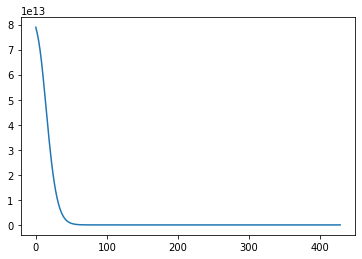

In [424]:
plt.plot(conv_graph[20:])

In [0]:
sr=16000

In [426]:
wavfile.write('speaker1.wav', sr,y1)
IPython.display.Audio("speaker1.wav")

In [427]:
y2=y2*1000
y2=np.array(y2,dtype=np.int16)
wavfile.write('speaker2.wav', sr,y2)
IPython.display.Audio("speaker2.wav")

In [428]:
y3=y3*1000
y3=np.array(y3,dtype=np.int16)
wavfile.write('speaker3.wav', sr,y3)
IPython.display.Audio("speaker3.wav")

In [429]:
y4=y4*1000
y4=np.array(y4,dtype=np.int16)
wavfile.write('speaker4.wav', sr,y4)
IPython.display.Audio("speaker4.wav")

# P2: Ideal Masks

In [430]:
f,piano= wavfile.read('piano.wav')
piano.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


(80000,)

In [431]:
IPython.display.Audio('piano.wav')

In [432]:
f,ocean= wavfile.read('ocean.wav')
ocean.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


(80000,)

In [433]:
IPython.display.Audio('ocean.wav')

In [0]:
s, sr=librosa.load('piano.wav', sr=None)
S=librosa.core.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('ocean.wav', sr=None)
N=librosa.core.stft(sn, n_fft=1024, hop_length=512)

In [435]:
S.shape,N.shape

((513, 157), (513, 157))

In [436]:
X=S+N
X

array([[ 2.4796402e+00-0.0000000e+00j, -2.7586892e-01-0.0000000e+00j,
        -2.4748632e-01-0.0000000e+00j, ...,
        -1.1128480e-01-0.0000000e+00j, -7.1384504e-02-0.0000000e+00j,
        -1.0244542e+00-0.0000000e+00j],
       [-2.5534725e+00-6.4618449e-17j, -2.3464248e-02+7.7353966e-01j,
        -2.0824194e-01-3.4451520e-01j, ...,
         2.8291020e-01+9.3047850e-02j,  4.3232241e-01-1.6477022e-01j,
         8.0756158e-01-9.5193714e-01j],
       [ 8.8105673e-01+3.3678295e-17j,  6.3804376e-01-2.1409087e+00j,
         1.4541254e+00+1.0430521e+00j, ...,
        -4.6022832e-01+2.2497474e-01j, -7.6389337e-01+3.5750276e-01j,
        -3.0537257e-01+1.0053883e+00j],
       ...,
       [ 7.6372370e-02+7.9550687e-18j, -8.2940683e-02-8.7257609e-02j,
         1.3662851e-02+3.6600396e-02j, ...,
        -1.6818590e-03+7.6094277e-02j,  1.2824509e-02+6.3386545e-02j,
         9.4554283e-02-3.0382100e-01j],
       [-6.7310572e-02+1.6870186e-16j,  3.2634050e-02+5.5934764e-03j,
        -6.3161547e-03

In [437]:
M=S/X
M

array([[ 1.12650864e-01+0.0000000e+00j,  8.52515161e-01-0.0000000e+00j,
        -1.54456854e-01+0.0000000e+00j, ...,
         1.09104197e-02-0.0000000e+00j,  1.88739353e-03-0.0000000e+00j,
         5.61459281e-04-0.0000000e+00j],
       [ 2.24830627e-01+6.1227234e-17j,  6.37907982e-01+2.7763855e-01j,
         4.21974272e-01-1.3289751e+00j, ...,
        -9.39902849e-03+3.8823590e-03j, -3.74393724e-03+1.0337944e-03j,
        -6.84529659e-04+4.5462482e-04j],
       [ 3.00082475e-01-1.1452969e-16j,  7.56512702e-01+6.8917163e-02j,
         6.54190421e-01-4.1865718e-01j, ...,
        -7.92318862e-03-1.6283855e-02j, -3.93327791e-03+1.7371447e-03j,
        -1.04990017e-04-1.4602388e-03j],
       ...,
       [-2.16837913e-01+2.6652065e-15j, -2.64060721e-02+1.4097358e-02j,
         1.88237175e-01+3.2304004e-03j, ...,
        -3.67075601e-03-2.5906088e-03j,  1.42152270e-03+4.6696519e-03j,
         7.97834771e-04-4.0670368e-04j],
       [ 7.09322169e-02-2.2576687e-15j,  3.24625522e-02-1.5771687e-0

In [438]:
S=np.multiply(M,X)
S

array([[ 2.79333621e-01+0.0000000e+00j, -2.35182434e-01+0.0000000e+00j,
         3.82259600e-02+0.0000000e+00j, ...,
        -1.21416384e-03+0.0000000e+00j, -1.34730653e-04+0.0000000e+00j,
        -5.75189362e-04+0.0000000e+00j],
       [-5.74098825e-01-1.7087026e-16j, -2.29732469e-01+4.8693255e-01j,
        -5.45724869e-01+1.3137181e-01j, ...,
        -3.02032614e-03+2.2379961e-04j, -1.44824944e-03+1.0638218e-03j,
        -1.20025594e-04+1.0187668e-03j],
       [ 2.64389694e-01-9.0800886e-17j,  6.30233586e-01-1.5756525e+00j,
         1.38795614e+00+7.3574662e-02j, ...,
         7.30993180e-03+5.7117739e-03j,  2.38357089e-03-2.7331510e-03j,
         1.50016812e-03+3.4036115e-04j],
       ...,
       [-1.65604260e-02+2.0182319e-16j,  3.42023955e-03+1.1348862e-03j,
         2.45362264e-03+6.9336914e-03j, ...,
         2.03304196e-04-2.7496647e-04j, -2.77762767e-04+1.4999141e-04j,
        -4.81264215e-05-2.8085453e-04j],
       [-4.77448804e-03+1.6393137e-16j,  1.14760315e-03-3.3311552e-0

In [439]:
M_bar=S**2/(S**2+N**2)
M_bar

array([[ 1.58612113e-02+0.0000000e+00j,  9.70940828e-01-0.0000000e+00j,
         1.75854638e-02+0.0000000e+00j, ...,
         1.21663063e-04-0.0000000e+00j,  3.57572640e-06-0.0000000e+00j,
         3.15590711e-07-0.0000000e+00j],
       [ 7.75959268e-02+5.0290120e-17j,  1.05885851e+00+5.0029045e-01j,
         4.66043293e-01+4.3536922e-01j, ...,
         7.24584752e-05-7.1061389e-05j,  1.28676002e-05-7.6565884e-06j,
         2.62103811e-07-6.2131875e-07j],
       [ 1.55275434e-01-1.4304690e-16j,  9.19506788e-01+6.3097432e-02j,
         1.81279933e+00-4.0444845e-01j, ...,
        -1.90827501e-04+2.6033347e-04j,  1.24024546e-05-1.3515260e-05j,
        -2.11992506e-06+3.1274911e-07j],
       ...,
       [ 3.07771657e-02-6.0262228e-16j,  4.92598338e-04-6.9262023e-04j,
         5.10023236e-02+2.0473534e-03j, ...,
         6.81145184e-06+1.8844830e-05j, -1.99647311e-05+1.3127949e-05j,
         4.71355975e-07-6.5038466e-07j],
       [ 5.79519570e-03-3.9476921e-16j,  8.24248767e-04-1.1191490e-0

In [440]:
S_recon=np.multiply(M_bar,X)
S_recon

array([[ 3.93300988e-02+0.0000000e+00j, -2.67852396e-01+0.0000000e+00j,
        -4.35216166e-03-0.0000000e+00j, ...,
        -1.35392493e-05+0.0000000e+00j, -2.55251450e-07+0.0000000e+00j,
        -3.23308228e-07+0.0000000e+00j],
       [-1.98139071e-01-1.3342857e-16j, -4.11839843e-01+8.0733007e-01j,
         5.29415607e-02-2.5122112e-01j, ...,
         2.71113513e-05-1.3361886e-05j,  4.30137425e-06-5.4303118e-06j,
        -3.79791430e-07-7.5125951e-07j],
       [ 1.36806473e-01-1.2080302e-16j,  7.21771419e-01-1.9283212e+00j,
         3.05789828e+00+1.3027253e+00j, ...,
         2.92557670e-05-1.6274420e-04j, -4.64240975e-06+1.4758130e-05j,
         3.32932672e-07-2.2268528e-06j],
       ...,
       [ 2.35052500e-03-4.5778855e-17j, -1.01292826e-04+1.4463443e-05j,
         6.21903222e-04+1.8946780e-03j, ...,
        -1.44543958e-06+4.8661815e-07j, -1.08817324e-06-1.0971359e-06j,
        -1.53031792e-07-2.0470449e-07j],
       [-3.90077941e-04+2.7549801e-17j,  3.31585106e-05-3.1911950e-0

In [0]:
S_recon1=librosa.istft(S_recon,hop_length=512)

In [442]:
librosa.output.write_wav('piano_recons.wav', S_recon1, sr)
IPython.display.Audio("piano_recons.wav")

In [443]:
size = np.shape(S_recon1)[0]
s = s[: size]
SNR = 10 * np.log10(np.add.reduce(s**2, axis = None) / np.add.reduce((s-S_recon1)**2, axis =None))
print(SNR)

2.362750619649887


In [0]:
def IBM(S , N):

  M = np.greater(S , N) * 1
  
  return M

In [445]:
S.shape[0]

513

In [446]:
ibm_mat = np.zeros((513,157))
ibm_mat.shape

(513, 157)

In [447]:
for i in range(0 , S.shape[0]):
  for j in range(0 , S.shape[1]):
    print(S[i][j],N[i][j])
    mask = IBM(np.abs(S[i][j]) , np.abs(N[i][j]))
    ibm_mat[i][j]=mask

Streaming output truncated to the last 5000 lines.
(-0.001567675+0.010439245j) (-0.14546205+0.0003446658j)
(0.0023798568-0.0025036864j) (0.04488236-0.047136705j)
(0.00050355657-0.006493452j) (-0.19923143+0.07858101j)
(0.0031439015+0.0065040644j) (-0.03298711+0.06423233j)
(0.041412443-0.0045701405j) (0.32034275+0.1436622j)
(-0.019587435+0.0020776037j) (-0.085721485-0.09818698j)
(-0.0010218583+0.001563184j) (0.084646225+0.11088218j)
(-0.0009821006+0.0044649886j) (0.067921676-0.19605067j)
(0.00047893735-0.0026367358j) (-0.20199084-0.150583j)
(-0.00034549466-0.0001801848j) (0.015436355-0.16039571j)
(-0.00033041718+0.0006439429j) (0.27897632-0.10895608j)
(0.00036178337-0.0015632146j) (0.07789268+0.13380097j)
(0.0008087671+0.00062141696j) (-0.079514615-0.105495855j)
(8.99394e-05+0.00023904355j) (0.12595819-0.33051598j)
(0.034436323-0.0060934243j) (-0.057638895+0.099239886j)
(-0.021206051-0.052202705j) (-0.06519534-0.03592197j)
(-0.029372437-0.012169554j) (-0.30297056+0.20775367j)
(-0.0079996

In [448]:
B=np.array(ibm_mat)
B.shape

(513, 157)

In [449]:
S_recon_bin=np.multiply(B,X)
S_recon_bin

array([[ 0.        +0.j        , -0.27586892-0.j        ,
         0.        -0.j        , ...,  0.        -0.j        ,
         0.        -0.j        ,  0.        -0.j        ],
       [ 0.        -0.j        , -0.02346425+0.77353966j,
         0.        -0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.63804376-2.14090872j,
         1.4541254 +1.04305208j, ..., -0.        +0.j        ,
        -0.        +0.j        , -0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        , ..., -0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.        +0.j        ,  0.        +0.j        ,
        -0.        +0.j        , ..., -0.        +0.j        ,
         0.        -0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j       

In [450]:
ibm_mat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
S_recon_bin1=librosa.istft(S_recon_bin,hop_length=512)

In [452]:
librosa.output.write_wav('piano_recons_bin.wav', S_recon_bin1, sr)
IPython.display.Audio("piano_recons_bin.wav")

In [453]:
#size = np.shape(S_recon1)[0]
#s = s[: size]
SNR = 10 * np.log10(np.add.reduce(s**2, axis = None) / np.add.reduce((s-S_recon_bin1)**2, axis =None))
print(SNR)

7.375359535217285


# P3: Single-channel Source Separation

In [454]:
s, sr=librosa.load('trs.wav', sr=None)
S=librosa.core.stft(s, n_fft=1024, hop_length=512)
S=np.abs(S)
S

array([[8.5828468e-02, 7.5941324e-02, 6.3716717e-02, ..., 1.4847456e-01,
        5.6157976e-02, 1.0754323e-01],
       [4.4747673e-02, 3.8800228e-02, 2.8766163e-02, ..., 1.0129889e-01,
        3.3864412e-02, 8.7760627e-02],
       [4.0886593e-03, 9.0549566e-04, 4.3919026e-03, ..., 1.6825601e-02,
        8.0713063e-02, 7.5469159e-02],
       ...,
       [1.1899670e-03, 1.8232097e-03, 2.0577761e-03, ..., 2.5212490e-03,
        2.2791985e-03, 1.5238815e-03],
       [1.0943209e-03, 1.3953146e-03, 2.3724502e-03, ..., 3.0730756e-03,
        5.3562340e-03, 2.1524809e-03],
       [5.0358532e-04, 7.8370049e-06, 3.8119564e-03, ..., 3.2153272e-03,
        2.7322513e-03, 2.1242141e-03]], dtype=float32)

In [455]:
S.shape

(513, 989)

In [0]:
def NMF(S_t,r):
  flag=True
  W=np.random.rand(S_t.shape[0],r)
  H=np.random.rand(r,S_t.shape[1])
  while flag:
    delta_W=(np.matmul(S_t,H.T))/(np.matmul(W,np.matmul(H,H.T)))
    W=np.multiply(W,delta_W)
    delta_H=(np.matmul(W.T,S_t))/(np.matmul(np.matmul(W.T,W),H))
    H_old=H
    H=np.multiply(H,delta_H)
    if np.abs(np.all(H_old-H))<0.01:
      flag=False
  return W,H

In [457]:
s1, sr=librosa.load('trn.wav', sr=None)
S_N=librosa.core.stft(s1, n_fft=1024, hop_length=512)
S_N=np.abs(S_N)
S_N

array([[3.8825225e-02, 3.7840288e-02, 3.7708797e-02, ..., 2.0948581e-01,
        6.5171075e-01, 2.0980158e+00],
       [1.9641943e-02, 1.8943643e-02, 1.8766517e-02, ..., 3.1816784e-01,
        4.6591082e-01, 3.5516520e+00],
       [3.8977741e-04, 2.0074801e-04, 8.6556550e-04, ..., 2.5478740e+00,
        1.5232562e+00, 2.3894508e+00],
       ...,
       [3.2690479e-04, 5.2311819e-04, 2.8217377e-04, ..., 5.5170077e-01,
        3.2462454e-01, 5.2686626e-01],
       [3.5013925e-04, 4.7682563e-04, 5.7720649e-04, ..., 5.9246516e-01,
        5.9073985e-01, 4.3854141e-01],
       [7.2235247e-04, 1.4809078e-04, 8.1958511e-04, ..., 9.2783868e-01,
        3.4684628e-01, 2.5163659e-01]], dtype=float32)

In [458]:
S_N.shape

(513, 989)

In [0]:
W_S,H_S=NMF(S,30)
W_N,H_N=NMF(S_N,30)

In [460]:
W_S.shape,W_N.shape

((513, 30), (513, 30))

In [461]:
s2, sr=librosa.load('x_nmf.wav', sr=None)
S_nmf=librosa.core.stft(s2, n_fft=1024, hop_length=512)
S_nmf_abs=np.abs(S_nmf)
S_nmf

array([[ 2.143183  -0.0000000e+00j, -0.7852648 -0.0000000e+00j,
         0.13705358-0.0000000e+00j, ...,  0.81497943-0.0000000e+00j,
         0.01538297-0.0000000e+00j, -3.8225696 -0.0000000e+00j],
       [-1.1388351 +4.6192434e-16j,  1.3679144 -8.5271621e-01j,
         0.4485755 -1.0254747e+00j, ..., -0.9138572 +7.7188122e-01j,
         0.29395327-8.3471882e-01j,  3.7281902 +2.2297688e-02j],
       [-1.0581868 -4.7704896e-17j, -0.65268207+9.2130947e-01j,
        -0.3341887 +2.9296417e+00j, ...,  1.6603658 -5.3171478e-02j,
        -1.2570806 +1.2367637e+00j, -3.0385218 -3.3637058e-02j],
       ...,
       [ 1.7409123 +6.1582683e-17j, -0.21288382+1.1432891e+00j,
         3.3590522 -2.6717620e+00j, ...,  0.12119363+1.3441868e-01j,
         0.07429627-3.3368830e-02j,  0.84608907-1.1213245e-02j],
       [ 1.0599792 +3.4472208e-16j, -0.7183881 -1.7835386e+00j,
        -0.6624329 +3.8355713e+00j, ..., -0.1474406 -5.0639894e-02j,
        -0.13745032+4.1349657e-02j, -0.6736856 +4.3623499e-03j]

In [462]:
S_nmf.shape

(513, 131)

In [463]:
W=np.hstack((W_S,W_N))
W.shape

(513, 60)

In [0]:
H=np.random.rand(60,131)
flag=True
while flag:
    delta_H=(np.matmul(W.T,S_nmf_abs))/(np.matmul(np.matmul(W.T,W),H))
    H_old=H
    H=np.multiply(H,delta_H)
    if np.abs(np.all(H_old-H))<0.01:
      flag=False
    Y=np.matmul(W,H)

In [465]:
Y

array([[0.97417294, 0.76342402, 0.8480864 , ..., 0.33139795, 0.58534262,
        0.45737842],
       [1.01712509, 0.76679494, 1.46099396, ..., 0.49765361, 1.43191287,
        1.37733881],
       [1.11058343, 0.89727891, 2.2755543 , ..., 0.89390075, 2.27416285,
        2.77639627],
       ...,
       [1.43714347, 1.02365931, 1.54031301, ..., 0.93690228, 0.91215025,
        0.65377099],
       [1.26847916, 0.96697576, 1.46953987, ..., 1.00887267, 0.96253603,
        0.54627005],
       [1.03690955, 0.8145332 , 1.26563695, ..., 0.85437767, 0.85434194,
        0.48696444]])

In [466]:
W_S.shape,H[0:30,:].shape

((513, 30), (30, 131))

In [0]:
S_est=np.matmul(W_S,H[0:30,:])

In [0]:
phase_S_nmf=S_nmf/S_nmf_abs

In [469]:
phase_S_nmf

array([[ 1.        -0.0000000e+00j, -0.99999994+0.0000000e+00j,
         1.        -0.0000000e+00j, ...,  1.        -0.0000000e+00j,
         1.        -0.0000000e+00j, -1.        +0.0000000e+00j],
       [-1.        +4.0561126e-16j,  0.8486196 -5.2900362e-01j,
         0.40076658-9.1618019e-01j, ..., -0.76395595+6.4526850e-01j,
         0.3321635 -9.4322181e-01j,  0.99998206+5.9807273e-03j],
       [-1.        -4.5081734e-17j, -0.57806915+8.1598777e-01j,
        -0.11333653+9.9355668e-01j, ...,  0.9994877 -3.2007545e-02j,
        -0.7128438 +7.0132285e-01j, -0.9999387 -1.1069526e-02j],
       ...,
       [ 1.        +3.5373800e-17j, -0.18305658+9.8310238e-01j,
         0.782625  -6.2249339e-01j, ...,  0.6696263 +7.4269813e-01j,
         0.91221756-4.0970609e-01j,  0.9999122 -1.3251868e-02j],
       [ 1.        +3.2521589e-16j, -0.37361908-9.2758226e-01j,
        -0.17018822+9.8541158e-01j, ..., -0.945771  -3.2483414e-01j,
        -0.9576063 +2.8808004e-01j, -0.999979  +6.4752139e-03j]

In [0]:
S_new=np.multiply(phase_S_nmf,S_est)
S_recon_1=librosa.istft(S_new,hop_length=512)

In [471]:
librosa.output.write_wav('nmf_recons_audio.wav', S_recon_1, sr)
IPython.display.Audio("nmf_recons_audio.wav")

In [0]:
M_bar=S_est/Y

In [473]:
S_recon_m=np.multiply(M_bar,S_nmf)
S_recon_m

array([[ 2.55453036e-02+0.00000000e+00j, -1.82497916e-03-0.00000000e+00j,
         2.86611867e-04+0.00000000e+00j, ...,
         3.22212481e-04+0.00000000e+00j,  1.22321345e-05+0.00000000e+00j,
        -3.62973813e-03-0.00000000e+00j],
       [-1.27674166e-02+5.17860803e-18j,  3.12031080e-03-1.94510674e-03j,
         5.44939057e-04-1.24576844e-03j, ...,
        -1.97026543e-04+1.66416685e-04j,  1.54627420e-04-4.39084820e-04j,
         1.90241740e-03+1.13780433e-05j],
       [-9.55235609e-03-4.30636786e-19j, -1.11194507e-03+1.56959349e-03j,
        -2.45687717e-04+2.15380409e-03j, ...,
         1.17801257e-04-3.77246199e-06j, -5.54623226e-04+5.45659448e-04j,
        -1.02461643e-03-1.13427136e-05j],
       ...,
       [ 4.06735523e-01+1.43877809e-17j, -9.76063611e-03+5.24193385e-02j,
         6.09232000e-02-4.84578033e-02j, ...,
         3.73668012e-05+4.14443924e-05j,  2.59548664e-09-1.16571608e-09j,
         5.23435670e-09-6.93710932e-11j],
       [ 2.85221963e-01+9.27587149e-17j, -3.

In [0]:
S_recon_m1=librosa.istft(S_recon_m,hop_length=512)

In [475]:
librosa.output.write_wav('mask_audio.wav', S_recon_m1, sr)
IPython.display.Audio("mask_audio.wav")

I think the output audio we got after masking will have a greater SNR value as the audio is more clearer than the other.

# P4: Motor Imagery

In [0]:
import scipy.io
mat = scipy.io.loadmat('eeg.mat')

In [477]:
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Feb 17 23:48:14 2017',
 '__version__': '1.0',
 'x_te': array([[[-0.09912109,  0.06787109, -0.14160156, ..., -0.11474609,
          -0.02880859,  0.05615234],
         [-0.04248047,  0.06103516, -0.1875    , ..., -0.08496094,
          -0.07861328, -0.015625  ],
         [-0.04101562,  0.09521484, -0.05029297, ..., -0.09863281,
           0.0078125 , -0.02783203]],
 
        [[ 0.07226562,  0.14306641, -0.07080078, ..., -0.07568359,
          -0.02539062,  0.07324219],
         [ 0.05712891,  0.12158203, -0.14697266, ..., -0.06787109,
          -0.06738281, -0.00195312],
         [ 0.05761719,  0.13867188, -0.03515625, ..., -0.09619141,
           0.03613281,  0.00244141]],
 
        [[ 0.18212891,  0.13964844, -0.04003906, ...,  0.00439453,
          -0.015625  ,  0.02539062],
         [ 0.10888672,  0.07617188, -0.08935547, ..., -0.01904297,
          -0.07080078,  0.00878906],
         [ 0.119

In [478]:
x_te=mat['x_te']
x_te.shape

(768, 3, 28)

In [479]:
x_train=mat['x_train']
x_train.shape

(768, 3, 112)

In [480]:
y_train=mat['y_train']
y_train.shape

(112, 1)

In [481]:
y_test=mat['y_te']
y_test.shape

(28, 1)

In [482]:
x1_t=x_train[:,0,:].T
x2_t=x_train[:,1,:].T
x3_t=x_train[:,2,:].T
x1_t.shape,x2_t.shape,x3_t.shape

((112, 768), (112, 768), (112, 768))

In [0]:
S1_t=[]
S2_t=[]
S3_t=[]
for i in range(x1_t.shape[0]):
  S1_t.append(librosa.core.stft(x1_t[i,:], n_fft=64, hop_length=48,window='blackman'))
  S2_t.append(librosa.core.stft(x2_t[i,:], n_fft=64, hop_length=48,window='blackman'))
  S3_t.append(librosa.core.stft(x3_t[i,:], n_fft=64, hop_length=48,window='blackman'))
#S1_t.shape,S2_t.shape,S3_t.shape

In [484]:
S1_t=np.array(S1_t)
S2_t=np.array(S2_t)
S3_t=np.array(S3_t)
S1_t.shape,S2_t.shape,S3_t.shape

((112, 33, 17), (112, 33, 17), (112, 33, 17))

In [485]:
S1_t=S1_t[:,2:7,:]
S2_t=S2_t[:,2:7,:]
S3_t=S3_t[:,2:7,:]
S1_t.shape,S2_t.shape,S3_t.shape

((112, 5, 17), (112, 5, 17), (112, 5, 17))

In [0]:
S_t=[]
for i in range(S1_t.shape[0]):
  s=np.vstack((S1_t[i,:,:],S2_t[i,:,:],S3_t[i,:,:]))
  s=s.flatten()
  S_t.append(s)


In [487]:
S_t=np.array(S_t).T
S_t.shape

(255, 112)

In [488]:
S_t

array([[-0.18705301+2.97623985e-17j, -0.15800765+6.01627402e-18j,
        -1.2769308 -1.96261554e-17j, ..., -0.4460323 -2.49175007e-17j,
         0.39287174+6.34363075e-18j, -0.43322602-2.77555756e-17j],
       [-0.16769905-2.59186894e-01j,  0.0889667 -1.24706089e-01j,
        -0.14289826-3.93401951e-01j, ...,  0.09796612+3.77076030e-01j,
         0.28597298+1.58523172e-01j,  0.41336125+2.01544628e-01j],
       [-0.10207901+5.35322487e-01j, -0.16498095-1.48869693e-01j,
         0.35892558-1.67546049e-01j, ..., -0.26501828-2.57846504e-01j,
         0.06367294-1.82372518e-02j,  0.19769941+2.50049122e-02j],
       ...,
       [ 0.03431823+1.41867369e-01j, -0.19715536+3.11366618e-01j,
         0.1337263 -4.81889904e-01j, ..., -0.02824488+6.50425330e-02j,
        -0.12979406-4.80915815e-01j,  0.54155445-1.03305476e-02j],
       [ 0.41499385-2.70438492e-01j, -0.31009653+3.88155341e-01j,
         0.35470533-3.85713816e-01j, ..., -0.0369519 +1.28223374e-01j,
        -1.1584295 -7.53163695e-01j

In [489]:
S_t=np.abs(S_t)
S_t

array([[0.18705301, 0.15800765, 1.2769308 , ..., 0.4460323 , 0.39287174,
        0.43322602],
       [0.3087083 , 0.15318839, 0.4185511 , ..., 0.38959426, 0.32697117,
        0.459878  ],
       [0.5449681 , 0.22221813, 0.3961051 , ..., 0.369756  , 0.06623323,
        0.19927444],
       ...,
       [0.14595921, 0.36853683, 0.5001006 , ..., 0.07091054, 0.498123  ,
        0.541653  ],
       [0.4953351 , 0.49681428, 0.52401435, ..., 0.13344166, 1.3817433 ,
        0.635287  ],
       [0.72886443, 0.28911126, 0.72184086, ..., 0.19558182, 1.4029049 ,
        0.9134496 ]], dtype=float32)

In [490]:
W_2=np.random.rand(255,2)
H_2=np.random.rand(2,112)
W_2.shape,H_2.shape

((255, 2), (2, 112))

In [491]:
W_4=np.random.rand(255,4)
H_4=np.random.rand(4,112)
W_4.shape,H_4.shape

((255, 4), (4, 112))

In [492]:
W_6=np.random.rand(255,6)
H_6=np.random.rand(6,112)
W_6.shape,H_6.shape

((255, 6), (6, 112))

In [493]:
W_8=np.random.rand(255,8)
H_8=np.random.rand(8,112)
W_8.shape,H_8.shape

((255, 8), (8, 112))

In [494]:
W_10=np.random.rand(255,10)
H_10=np.random.rand(10,112)
W_10.shape,H_10.shape

((255, 10), (10, 112))

In [495]:
W_15=np.random.rand(255,15)
H_15=np.random.rand(15,112)
W_15.shape,H_15.shape

((255, 15), (15, 112))

In [496]:
W_20=np.random.rand(255,20)
H_20=np.random.rand(20,112)
W_20.shape,H_20.shape

((255, 20), (20, 112))

In [497]:
S_t.shape,W_2.shape,H_2.shape,H_2.T.shape

((255, 112), (255, 2), (2, 112), (112, 2))

In [0]:
for i in range(800):
  delta_W_2=(np.matmul(S_t,H_2.T))/(np.matmul(W_2,np.matmul(H_2,H_2.T)))
  W_2=np.multiply(W_2,delta_W_2)
  delta_H_2=(np.matmul(W_2.T,S_t))/(np.matmul(np.matmul(W_2.T,W_2),H_2))
  H_2=np.multiply(H_2,delta_H_2)

  delta_W_4=(np.matmul(S_t,H_4.T))/(np.matmul(W_4,np.matmul(H_4,H_4.T)))
  W_4=np.multiply(W_4,delta_W_4)
  delta_H_4=(np.matmul(W_4.T,S_t))/(np.matmul(np.matmul(W_4.T,W_4),H_4))
  H_4=np.multiply(H_4,delta_H_4)

  delta_W_6=(np.matmul(S_t,H_6.T))/(np.matmul(W_6,np.matmul(H_6,H_6.T)))
  W_6=np.multiply(W_6,delta_W_6)
  delta_H_6=(np.matmul(W_6.T,S_t))/(np.matmul(np.matmul(W_6.T,W_6),H_6))
  H_6=np.multiply(H_6,delta_H_6)

  delta_W_8=(np.matmul(S_t,H_8.T))/(np.matmul(W_8,np.matmul(H_8,H_8.T)))
  W_8=np.multiply(W_8,delta_W_8)
  delta_H_8=(np.matmul(W_8.T,S_t))/(np.matmul(np.matmul(W_8.T,W_8),H_8))
  H_8=np.multiply(H_8,delta_H_8)

  delta_W_10=(np.matmul(S_t,H_10.T))/(np.matmul(W_10,np.matmul(H_10,H_10.T)))
  W_10=np.multiply(W_10,delta_W_10)
  delta_H_10=(np.matmul(W_10.T,S_t))/(np.matmul(np.matmul(W_10.T,W_10),H_10))
  H_10=np.multiply(H_10,delta_H_10)

  delta_W_15=(np.matmul(S_t,H_15.T))/(np.matmul(W_15,np.matmul(H_15,H_15.T)))
  W_15=np.multiply(W_15,delta_W_15)
  delta_H_15=(np.matmul(W_15.T,S_t))/(np.matmul(np.matmul(W_15.T,W_15),H_15))
  H_15=np.multiply(H_15,delta_H_15)

  delta_W_20=(np.matmul(S_t,H_20.T))/(np.matmul(W_20,np.matmul(H_20,H_20.T)))
  W_20=np.multiply(W_20,delta_W_20)
  delta_H_20=(np.matmul(W_20.T,S_t))/(np.matmul(np.matmul(W_20.T,W_20),H_20))
  H_20=np.multiply(H_20,delta_H_20)

In [499]:
H_2

array([[4.61548778e-01, 2.60562962e-01, 6.57089106e-01, 6.93758871e-01,
        6.11259520e-01, 3.30270798e-03, 2.67262768e-01, 4.98987687e-01,
        7.68268037e-01, 8.35682254e-02, 5.25752828e-01, 7.29881460e-01,
        4.30529412e-01, 4.70663611e-01, 1.21116571e+00, 8.83165842e-01,
        1.52456949e+00, 7.27529712e-01, 4.80753689e-01, 4.16004578e-01,
        2.86647059e-01, 5.91526008e-01, 2.78495736e-01, 5.27673885e-01,
        4.96071527e-01, 2.64553104e-01, 6.11058298e-01, 3.50270149e-01,
        1.55882038e+00, 2.60381551e-01, 1.06566395e+00, 3.22113021e-01,
        3.75421311e-01, 9.33925944e-01, 7.04736457e-01, 9.36063088e-01,
        6.64537720e-01, 7.52984971e-01, 3.82682790e-01, 9.18046563e-01,
        1.01713146e+00, 1.19033215e+00, 3.73604393e-01, 1.39986110e-01,
        3.36013210e-01, 5.15055208e-01, 3.42823325e-01, 3.99382445e-01,
        1.08403782e+00, 2.68574997e-01, 4.14182805e-01, 3.64105894e-01,
        5.15062519e-01, 4.55784719e-01, 4.52379267e-01, 6.431342

In [500]:
#Test Data Transformation
x1_te=x_te[:,0,:].T
x2_te=x_te[:,1,:].T
x3_te=x_te[:,2,:].T
x1_te.shape,x2_te.shape,x3_te.shape

((28, 768), (28, 768), (28, 768))

In [0]:
S1_te=[]
S2_te=[]
S3_te=[]
for i in range(x1_te.shape[0]):
  S1_te.append(librosa.core.stft(x1_te[i], n_fft=64, hop_length=48,window='blackman'))
  S2_te.append(librosa.core.stft(x2_te[i], n_fft=64, hop_length=48,window='blackman'))
  S3_te.append(librosa.core.stft(x3_te[i], n_fft=64, hop_length=48,window='blackman'))

In [502]:
S1_te=np.array(S1_te)
S2_te=np.array(S2_te)
S3_te=np.array(S3_te)
S1_te.shape,S2_te.shape,S3_te.shape

((28, 33, 17), (28, 33, 17), (28, 33, 17))

In [503]:
S1_te=S1_te[:,2:7,:]
S2_te=S2_te[:,2:7,:]
S3_te=S3_te[:,2:7,:]
S1_te.shape,S2_te.shape,S3_te.shape

((28, 5, 17), (28, 5, 17), (28, 5, 17))

In [0]:
S_te=[]
for i in range(S1_te.shape[0]):
  s=np.vstack((S1_te[i,:,:],S2_te[i,:,:],S3_te[i,:,:]))
  s=s.flatten()
  S_te.append(s)

In [505]:
S_te=np.array(S_te).T
S_te.shape

(255, 28)

In [506]:
S_te=np.abs(S_te)
S_te

array([[1.188752  , 0.9327239 , 0.01076504, ..., 0.2646879 , 0.23306514,
        0.6877274 ],
       [0.21756738, 0.10936838, 0.16956879, ..., 0.2597872 , 0.5288073 ,
        0.14365835],
       [0.1932278 , 0.56648344, 0.47089493, ..., 0.37443474, 0.5150755 ,
        0.44718722],
       ...,
       [0.44001654, 1.6420388 , 0.3339757 , ..., 0.7599982 , 0.4912348 ,
        1.0947388 ],
       [0.9197676 , 1.5470611 , 0.5075994 , ..., 0.68017393, 0.28433135,
        0.612009  ],
       [1.6951755 , 2.0583556 , 0.06300055, ..., 0.42455536, 0.13614511,
        0.5449759 ]], dtype=float32)

In [507]:
W_2_te=np.random.rand(255,2)
H_2_te=np.random.rand(2,28)
W_2_te.shape,H_2_te.shape

((255, 2), (2, 28))

In [508]:
W_4_te=np.random.rand(255,4)
H_4_te=np.random.rand(4,28)
W_4_te.shape,H_4_te.shape

((255, 4), (4, 28))

In [509]:
W_6_te=np.random.rand(255,6)
H_6_te=np.random.rand(6,28)
W_6_te.shape,H_6_te.shape

((255, 6), (6, 28))

In [510]:
W_8_te=np.random.rand(255,8)
H_8_te=np.random.rand(8,28)
W_8_te.shape,H_8_te.shape

((255, 8), (8, 28))

In [511]:
W_10_te=np.random.rand(255,10)
H_10_te=np.random.rand(10,28)
W_10_te.shape,H_10_te.shape

((255, 10), (10, 28))

In [512]:
W_15_te=np.random.rand(255,15)
H_15_te=np.random.rand(15,28)
W_15_te.shape,H_15_te.shape

((255, 15), (15, 28))

In [513]:
W_20_te=np.random.rand(255,20)
H_20_te=np.random.rand(20,28)
W_20_te.shape,H_20_te.shape

((255, 20), (20, 28))

In [514]:
S_te.shape,W_2_te.shape,H_2_te.shape,H_2_te.T.shape

((255, 28), (255, 2), (2, 28), (28, 2))

In [0]:
for i in range(800):
  delta_W_2_te=(np.matmul(S_te,H_2_te.T))/(np.matmul(W_2_te,np.matmul(H_2_te,H_2_te.T)))
  W_2_te=np.multiply(W_2_te,delta_W_2_te)
  delta_H_2_te=(np.matmul(W_2_te.T,S_te))/(np.matmul(np.matmul(W_2_te.T,W_2_te),H_2_te))
  H_2_te=np.multiply(H_2_te,delta_H_2_te)

  delta_W_4_te=(np.matmul(S_te,H_4_te.T))/(np.matmul(W_4_te,np.matmul(H_4_te,H_4_te.T)))
  W_4_te=np.multiply(W_4_te,delta_W_4_te)
  delta_H_4_te=(np.matmul(W_4_te.T,S_te))/(np.matmul(np.matmul(W_4_te.T,W_4_te),H_4_te))
  H_4_te=np.multiply(H_4_te,delta_H_4_te)

  delta_W_6_te=(np.matmul(S_te,H_6_te.T))/(np.matmul(W_6_te,np.matmul(H_6_te,H_6_te.T)))
  W_6_te=np.multiply(W_6_te,delta_W_6_te)
  delta_H_6_te=(np.matmul(W_6_te.T,S_te))/(np.matmul(np.matmul(W_6_te.T,W_6_te),H_6_te))
  H_6_te=np.multiply(H_6_te,delta_H_6_te)

  delta_W_8_te=(np.matmul(S_te,H_8_te.T))/(np.matmul(W_8_te,np.matmul(H_8_te,H_8_te.T)))
  W_8_te=np.multiply(W_8_te,delta_W_8_te)
  delta_H_8_te=(np.matmul(W_8_te.T,S_te))/(np.matmul(np.matmul(W_8_te.T,W_8_te),H_8_te))
  H_8_te=np.multiply(H_8_te,delta_H_8_te)

  delta_W_10_te=(np.matmul(S_te,H_10_te.T))/(np.matmul(W_10_te,np.matmul(H_10_te,H_10_te.T)))
  W_10_te=np.multiply(W_10_te,delta_W_10_te)
  delta_H_10_te=(np.matmul(W_10_te.T,S_te))/(np.matmul(np.matmul(W_10_te.T,W_10_te),H_10_te))
  H_10_te=np.multiply(H_10_te,delta_H_10_te)

  delta_W_15_te=(np.matmul(S_te,H_15_te.T))/(np.matmul(W_15_te,np.matmul(H_15_te,H_15_te.T)))
  W_15_te=np.multiply(W_15_te,delta_W_15_te)
  delta_H_15_te=(np.matmul(W_15_te.T,S_te))/(np.matmul(np.matmul(W_15_te.T,W_15_te),H_15_te))
  H_15_te=np.multiply(H_15_te,delta_H_15_te)

  delta_W_20_te=(np.matmul(S_te,H_20_te.T))/(np.matmul(W_20_te,np.matmul(H_20_te,H_20_te.T)))
  W_20_te=np.multiply(W_20_te,delta_W_20_te)
  delta_H_20_te=(np.matmul(W_20_te.T,S_te))/(np.matmul(np.matmul(W_20_te.T,W_20_te),H_20_te))
  H_20_te=np.multiply(H_20_te,delta_H_20_te)

In [516]:
H_2_te.T.shape,y_test.shape,H_2.T.shape,y_train.shape

((28, 2), (28, 1), (112, 2), (112, 1))

In [517]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape,y_test.shape

((112,), (28,))

In [0]:
from collections import Counter

In [0]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        #print(k_neighbor_labels)
        #print(type(k_neighbor_labels[0]))

        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


In [0]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [521]:
k = 3
clf = KNN(k=k)
clf.fit(H_2.T, y_train)
predictions = clf.predict(H_2_te.T)
#print(predictions)
acc_2_3=accuracy(y_test, predictions)
print("k3H2 KNN classification accuracy",acc_2_3)

k3H2 KNN classification accuracy 0.5357142857142857


In [522]:
k = 3
clf = KNN(k=k)
clf.fit(H_4.T, y_train)
predictions = clf.predict(H_4_te.T)
acc_4_3=accuracy(y_test, predictions)
print("k3H4 KNN classification accuracy", acc_4_3)

k3H4 KNN classification accuracy 0.35714285714285715


In [523]:
k = 3
clf = KNN(k=k)
clf.fit(H_6.T, y_train)
predictions = clf.predict(H_6_te.T)
acc_6_3=accuracy(y_test, predictions)
print("k3H6 KNN classification accuracy", acc_6_3)

k3H6 KNN classification accuracy 0.25


In [524]:
k = 3
clf = KNN(k=k)
clf.fit(H_8.T, y_train)
predictions = clf.predict(H_8_te.T)
acc_8_3=accuracy(y_test, predictions)
print("k3H8 KNN classification accuracy", acc_8_3)

k3H8 KNN classification accuracy 0.5


In [525]:
k = 3
clf = KNN(k=k)
clf.fit(H_10.T, y_train)
predictions = clf.predict(H_10_te.T)
acc_10_3=accuracy(y_test, predictions)
print("k3H10 KNN classification accuracy", acc_10_3)

k3H10 KNN classification accuracy 0.6071428571428571


In [526]:
k = 3
clf = KNN(k=k)
clf.fit(H_15.T, y_train)
predictions = clf.predict(H_15_te.T)
acc_15_3=accuracy(y_test, predictions)
print("k3H15 KNN classification accuracy", acc_15_3)

k3H15 KNN classification accuracy 0.4642857142857143


In [527]:
k = 3
clf = KNN(k=k)
clf.fit(H_20.T, y_train)
predictions = clf.predict(H_20_te.T)
acc_20_3=accuracy(y_test, predictions)
print("k3H20 KNN classification accuracy", acc_20_3)

k3H20 KNN classification accuracy 0.4642857142857143


In [528]:
k = 11
clf = KNN(k=k)
clf.fit(H_2.T, y_train)
predictions = clf.predict(H_2_te.T)
#print(predictions)
acc_2_11=accuracy(y_test, predictions)
print("k11H2 KNN classification accuracy",acc_2_11)

clf = KNN(k=k)
clf.fit(H_4.T, y_train)
predictions = clf.predict(H_4_te.T)
acc_4_11=accuracy(y_test, predictions)
print("k11H4 KNN classification accuracy", acc_4_11)

clf = KNN(k=k)
clf.fit(H_6.T, y_train)
predictions = clf.predict(H_6_te.T)
acc_6_11=accuracy(y_test, predictions)
print("k11H6 KNN classification accuracy", acc_6_11)

clf = KNN(k=k)
clf.fit(H_8.T, y_train)
predictions = clf.predict(H_8_te.T)
acc_8_11=accuracy(y_test, predictions)
print("k11H8 KNN classification accuracy", acc_8_11)

clf = KNN(k=k)
clf.fit(H_10.T, y_train)
predictions = clf.predict(H_10_te.T)
acc_10_11=accuracy(y_test, predictions)
print("k11H10 KNN classification accuracy", acc_10_11)

clf = KNN(k=k)
clf.fit(H_15.T, y_train)
predictions = clf.predict(H_15_te.T)
acc_15_11=accuracy(y_test, predictions)
print("k11H15 KNN classification accuracy", acc_15_11)

clf = KNN(k=k)
clf.fit(H_20.T, y_train)
predictions = clf.predict(H_20_te.T)
acc_20_11=accuracy(y_test, predictions)
print("k11H20 KNN classification accuracy", acc_20_11)

k11H2 KNN classification accuracy 0.6071428571428571
k11H4 KNN classification accuracy 0.2857142857142857
k11H6 KNN classification accuracy 0.35714285714285715
k11H8 KNN classification accuracy 0.5
k11H10 KNN classification accuracy 0.4642857142857143
k11H15 KNN classification accuracy 0.42857142857142855
k11H20 KNN classification accuracy 0.42857142857142855


In [529]:
k = 15
clf = KNN(k=k)
clf.fit(H_2.T, y_train)
predictions = clf.predict(H_2_te.T)
#print(predictions)
acc_2_15=accuracy(y_test, predictions)
print("k15H2 KNN classification accuracy",acc_2_15)

clf = KNN(k=k)
clf.fit(H_4.T, y_train)
predictions = clf.predict(H_4_te.T)
acc_4_15=accuracy(y_test, predictions)
print("k15H4 KNN classification accuracy", acc_4_15)

clf = KNN(k=k)
clf.fit(H_6.T, y_train)
predictions = clf.predict(H_6_te.T)
acc_6_15=accuracy(y_test, predictions)
print("k15H6 KNN classification accuracy", acc_6_15)

clf = KNN(k=k)
clf.fit(H_8.T, y_train)
predictions = clf.predict(H_8_te.T)
acc_8_15=accuracy(y_test, predictions)
print("k15H8 KNN classification accuracy", acc_8_15)

clf = KNN(k=k)
clf.fit(H_10.T, y_train)
predictions = clf.predict(H_10_te.T)
acc_10_15=accuracy(y_test, predictions)
print("k15H10 KNN classification accuracy", acc_10_15)

clf = KNN(k=k)
clf.fit(H_15.T, y_train)
predictions = clf.predict(H_15_te.T)
acc_15_15=accuracy(y_test, predictions)
print("k15H15 KNN classification accuracy", acc_15_15)

clf = KNN(k=k)
clf.fit(H_20.T, y_train)
predictions = clf.predict(H_20_te.T)
acc_20_15=accuracy(y_test, predictions)
print("k15H20 KNN classification accuracy", acc_20_15)

k15H2 KNN classification accuracy 0.6071428571428571
k15H4 KNN classification accuracy 0.2857142857142857
k15H6 KNN classification accuracy 0.35714285714285715
k15H8 KNN classification accuracy 0.5357142857142857
k15H10 KNN classification accuracy 0.42857142857142855
k15H15 KNN classification accuracy 0.39285714285714285
k15H20 KNN classification accuracy 0.5


In [0]:
table_of_accuracies=pd.DataFrame({'K_neigbors':[3,3,3,3,3,3,3,11,11,11,11,11,11,11,15,15,15,15,15,15,15], 
                                  'H_Rank':[2,4,6,8,10,15,20,2,4,6,8,10,15,20,2,4,6,8,10,15,20],
                                  'Accuracies':[acc_2_3,acc_4_3,acc_6_3,acc_8_3,acc_10_3,acc_15_3,acc_20_3,acc_2_11,acc_4_11,acc_6_11,acc_8_11,acc_10_11,acc_15_11,acc_20_11,acc_2_15,acc_4_15,acc_6_15,acc_8_15,acc_10_15,acc_15_15,acc_20_15]} )

In [531]:
table_of_accuracies

,K_neigbors,H_Rank,Accuracies
0,3,2,0.535714
1,3,4,0.357143
2,3,6,0.250000
3,3,8,0.500000
4,3,10,0.607143
5,3,15,0.464286
6,3,20,0.464286
7,11,2,0.607143
8,11,4,0.285714
9,11,6,0.357143
